# <img src="https://img.icons8.com/external-flaticons-lineal-color-flat-icons/64/undefined/external-big-data-smart-technology-flaticons-lineal-color-flat-icons-2.png"/> **NLP Research <br>BiLSTM CRF Named Entity Recognition**
## <img src="https://img.icons8.com/external-fauzidea-flat-fauzidea/64/undefined/external-man-avatar-avatar-fauzidea-flat-fauzidea.png"/> **`Dimas Dwi Putra`**

# **BILSTM-CRF Model Architecture**

<center>

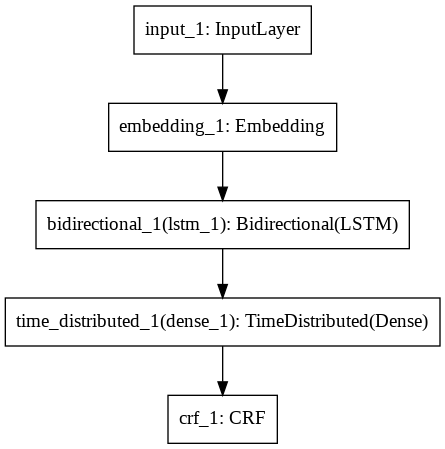

</center>

# **Connect google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Requirements Python Libraries**

In [ ]:
! pip install tensorflow==2.2.0
! pip install keras==2.3.1
! pip install git+https://www.github.com/keras-team/keras-contrib.git

In [ ]:
! pip install sklearn-crfsuite
! pip install seqeval

In [ ]:
! pip install pickle5

Restart runtime

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# **Import Python Libraries**

In [5]:
import pandas as pd
import numpy as np

# **Read NER Dataset**

In [6]:
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/bert_bilstm_crf_named_entity_recognition/BILSTM-CRF-NER/input/ner_dataset.csv')

## **Display 20 Data pertama**

In [7]:
df.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 0,studies,NNS,O
1,Sentence: 0,on,IN,O
2,Sentence: 0,magnesium,NN,O
3,Sentence: 0,s,NN,O
4,Sentence: 0,mechanism,NN,O
5,Sentence: 0,of,IN,O
6,Sentence: 0,action,NN,O
7,Sentence: 0,in,IN,O
8,Sentence: 0,digitalis,NN,plant
9,Sentence: 0,induced,VBD,O


## **Display 20 Data Terakhir**

In [8]:
df.tail(20)

,Sentence #,Word,POS,Tag
38185,Sentence: 1309,use,NN,O
38186,Sentence: 1309,these,DT,O
38187,Sentence: 1309,findings,NNS,O
38188,Sentence: 1309,suggest,VBP,O
38189,Sentence: 1309,that,IN,O
38190,Sentence: 1309,part,NN,O
38191,Sentence: 1309,of,IN,O
38192,Sentence: 1309,the,DT,O
38193,Sentence: 1309,association,NN,O
38194,Sentence: 1309,between,IN,O


## **Menghitung Jumlah Baris dan Kolom**

In [9]:
df.shape

(38205, 4)

## **Displaying Tags**

In [10]:
df['Tag'].unique()

array(['O', 'plant', 'disease'], dtype=object)

## **Checking missing values, if data > 0 is `null`**

In [11]:
df.isnull().sum()

Sentence #    0
Word          0
POS           0
Tag           0
dtype: int64

## **Detail Dataset**

In [12]:
df.describe()

,Sentence #,Word,POS,Tag
count,38205,38205,38205,38205
unique,1310,3089,32,3
top,Sentence: 264,and,NN,O
freq,137,1704,11655,32002


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38205 entries, 0 to 38204
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentence #  38205 non-null  object
 1   Word        38205 non-null  object
 2   POS         38205 non-null  object
 3   Tag         38205 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


In [14]:
df.loc[df['Tag'] == 'O', 'Word'].head()

0      studies
1           on
2    magnesium
3            s
4    mechanism
Name: Word, dtype: object

In [15]:
df.loc[df['Tag'] == 'plant', 'Word'].head()

8     digitalis
17    digitalis
52    digitalis
58        green
59          tea
Name: Word, dtype: object

In [16]:
df.loc[df['Tag'] == 'disease', 'Word'].head()

10    arrhythmias
19    arrhythmias
54    arrhythmias
65           skin
66     papillomas
Name: Word, dtype: object

# **Visualisasi**

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## **Visualisasi Tag**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


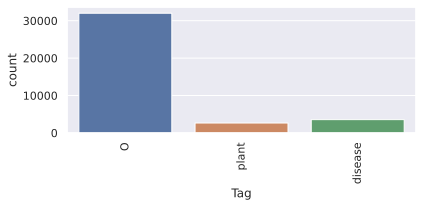

In [18]:
plt.figure(figsize=(6, 3))
ax = sns.countplot('Tag', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## **Visualisasi POS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


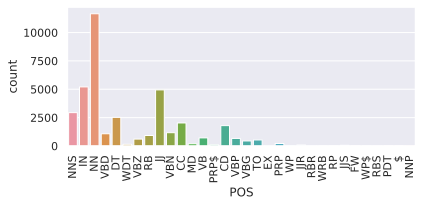

In [19]:
#Words distribution across POS
plt.figure(figsize=(6, 3))
ax = sns.countplot('POS', data=df, orient='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

# **Class get sentence, the sentence will be list of tuples with its tag and pos**

In [20]:
class sentence(object):
    def __init__(self, df):
        self.n_sent = 1
        self.df = df
        self.empty = False
        agg = lambda s : [(w, p, t) for w, p, t in zip(s['Word'].values.tolist(),
                                                       s['POS'].values.tolist(),
                                                       s['Tag'].values.tolist())]
        self.grouped = self.df.groupby("Sentence #").apply(agg)
        self.sentences = [s for s in self.grouped]
        
    def get_text(self):
        try:
            s = self.grouped['Sentence: {}'.format(self.n_sent)]
            self.n_sent +=1
            return s
        except:
            return None

## **Displaying one full sentence**

In [21]:
getter = sentence(df)
sentences = [" ".join([s[0] for s in sent]) for sent in getter.sentences]
sentences[1]

'the mechanism by which magnesium affects digitalis induced arrhythmias was studied in dogs with and without beta receptor'

## **Sentence With POS TAGGING**

In [22]:
sent = getter.get_text()
print(sent)

[('the', 'DT', 'O'), ('mechanism', 'NN', 'O'), ('by', 'IN', 'O'), ('which', 'WDT', 'O'), ('magnesium', 'NN', 'O'), ('affects', 'VBZ', 'O'), ('digitalis', 'RB', 'plant'), ('induced', 'JJ', 'O'), ('arrhythmias', 'NN', 'disease'), ('was', 'VBD', 'O'), ('studied', 'VBN', 'O'), ('in', 'IN', 'O'), ('dogs', 'NNS', 'O'), ('with', 'IN', 'O'), ('and', 'CC', 'O'), ('without', 'IN', 'O'), ('beta', 'NN', 'O'), ('receptor', 'NN', 'O')]


In [23]:
len(sentences[1])

121

## **Getting All Sentence in the Dataset**

In [24]:
sentences = getter.sentences

# **Defining the parameters for LSTM network**

In [25]:
batch_size = 32 
epochs = 10
max_len = 150
embedding = 50 

# **Preprocessing Data**

We will process our text data before feeding to the network.

Here word_to_index dictionary used to convert word into index value and tag_to_index is for the labels. So overall we represent each word as integer

## **Getting unique words and labels from data**

In [26]:
words = list(df['Word'].unique())
tags = list(df['Tag'].unique())

# Dictionary word:index pair
# word is key and its value is corresponding index
word_to_index = {w : i + 2 for i, w in enumerate(words)}
word_to_index["UNK"] = 1
word_to_index["PAD"] = 0

# Dictionary lable:index pair
# label is key and value is index.
tag_to_index = {t : i + 1 for i, t in enumerate(tags)}
tag_to_index["PAD"] = 0

idx2word = {i: w for w, i in word_to_index.items()}
idx2tag = {i: w for w, i in tag_to_index.items()}

In [ ]:
print("Studies on magnesium's mechanism of action in digitalis -induced arrhythmias .")
print("..")
print("The word digitalis is identified by the index: {}".format(word_to_index["digitalis"]))
print("The word arrhythmias is identified by the index: {}".format(word_to_index["arrhythmias"]))

Studies on magnesium's mechanism of action in digitalis -induced arrhythmias .
..
The word digitalis is identified by the index: 10
The word arrhythmias is identified by the index: 12


In [27]:
print("label O is identified by the index: {}".format(tag_to_index["O"]))
print("label plant is identified by the index: {}".format(tag_to_index["plant"]))
print("label disease is identified by the index: {}".format(tag_to_index["disease"]))

label O is identified by the index: 1
label plant is identified by the index: 2
label disease is identified by the index: 3


## **Import Python Keras Libraries**

In [28]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.layers import LSTM, Dense, TimeDistributed, Embedding, Bidirectional
from keras.models import Model, Input
from keras_contrib.layers import CRF
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import text_to_word_sequence

Using TensorFlow backend.


In [29]:
import warnings
warnings.filterwarnings("ignore")

## **Converting each sentence into list of index from list of tokens and Padding each sequence to have same length  of each word**

In [30]:
X = [[word_to_index[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = word_to_index["PAD"])

## **Convert label to index and padding**

In [31]:
y = [[tag_to_index[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen = max_len, sequences = y, padding = "post", value = tag_to_index["PAD"])

In [32]:
num_tag = df['Tag'].nunique()

## **Encoded labels**

In [33]:
y = [to_categorical(i, num_classes = num_tag + 1) for i in y]

## **Import Python Sklearn Libraries**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn_crfsuite.metrics import flat_classification_report, flat_f1_score, flat_recall_score, flat_precision_score, flat_accuracy_score
# from sklearn_crfsuite import metrics
from sklearn.metrics import f1_score
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [36]:
print("Size of training input data : ", X_train.shape)
print("Size of training output data : ", np.array(y_train).shape)
print("Size of testing input data : ", X_test.shape)
print("Size of testing output data : ", np.array(y_test).shape)

Size of training input data :  (1113, 150)
Size of training output data :  (1113, 150, 4)
Size of testing input data :  (197, 150)
Size of testing output data :  (197, 150, 4)


## **Check the first sentence before and after processing**

In [37]:
print('*****Before Processing first sentence : *****\n', ' '.join([w[0] for w in sentences[0]]))
print('*****After Processing first sentence : *****\n ', X[0])

*****Before Processing first sentence : *****
 studies on magnesium s mechanism of action in digitalis induced arrhythmias
*****After Processing first sentence : *****
  [ 2  3  4  5  6  7  8  9 10 11 12  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]


## **First label before and after processing**

In [38]:
print('*****Before Processing first sentence : *****\n', ' '.join([w[2] for w in sentences[0]]))
print('*****After Processing first sentence : *****\n ', y[0])

*****Before Processing first sentence : *****
 O O O O O O O O plant O disease
*****After Processing first sentence : *****
  [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1.

# **Bidirectional LSTM-CRF Network**

In [39]:
num_tags = df['Tag'].nunique()

# Model architecture
input = Input(shape = (max_len,))
model = Embedding(input_dim = len(words) + 2, output_dim = embedding, input_length = max_len, mask_zero=False)(input)
model = Bidirectional(LSTM(units = 50, return_sequences=True, recurrent_dropout=0.1))(model)
model = TimeDistributed(Dense(50, activation="relu"))(model)
# CRF layer
crf = CRF(num_tags+1)
# output
out = crf(model)

model = Model(input, out)
model.compile(optimizer="rmsprop", loss=crf.loss_function, metrics=[crf.accuracy])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           154550    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 150, 100)          40400     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 150, 50)           5050      
_________________________________________________________________
crf_1 (CRF)                  (None, 150, 4)            228       
Total params: 200,228
Trainable params: 200,228
Non-trainable params: 0
_________________________________________________________________


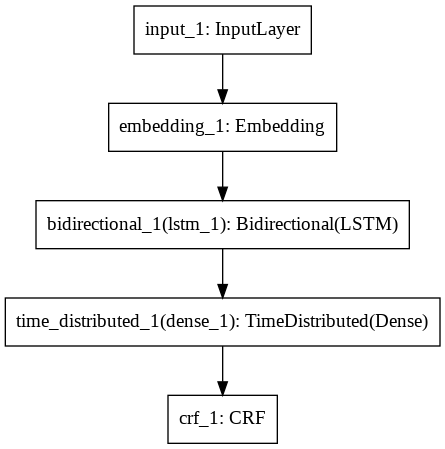

In [40]:
plot_model(model)

# **Making Checkpoint each epoch to check and save the best model performance till last and also avoiding further validation loss drop due to overfitting**

In [41]:
checkpointer = ModelCheckpoint(filepath = './drive/MyDrive/Colab Notebooks/bert_bilstm_crf_named_entity_recognition/BILSTM-CRF-NER/output/model.h5', verbose = 0, mode = 'auto', save_best_only = True, monitor='val_loss')

In [42]:
history = model.fit(X_train, np.array(y_train), batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[checkpointer])

Train on 1001 samples, validate on 112 samples
Epoch 1/10
1001/1001 [==============================] - 22s 22ms/step - loss: 0.2998 - crf_viterbi_accuracy: 0.8859 - val_loss: 0.1267 - val_crf_viterbi_accuracy: 0.9687
Epoch 2/10
1001/1001 [==============================] - 29s 29ms/step - loss: 0.1246 - crf_viterbi_accuracy: 0.9656 - val_loss: 0.1034 - val_crf_viterbi_accuracy: 0.9691
Epoch 3/10
1001/1001 [==============================] - 27s 27ms/step - loss: 0.1027 - crf_viterbi_accuracy: 0.9670 - val_loss: 0.1081 - val_crf_viterbi_accuracy: 0.9678
Epoch 4/10
1001/1001 [==============================] - 22s 22ms/step - loss: 0.0826 - crf_viterbi_accuracy: 0.9701 - val_loss: 0.0698 - val_crf_viterbi_accuracy: 0.9733
Epoch 5/10
1001/1001 [==============================] - 21s 21ms/step - loss: 0.0599 - crf_viterbi_accuracy: 0.9778 - val_loss: 0.0488 - val_crf_viterbi_accuracy: 0.9799
Epoch 6/10
1001/1001 [==============================] - 23s 23ms/step - loss: 0.0445 - crf_viterbi_accu

# **Visualizing the performance of model**

In [43]:
history.history.keys()

dict_keys(['val_loss', 'val_crf_viterbi_accuracy', 'loss', 'crf_viterbi_accuracy'])

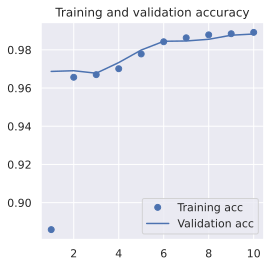

In [48]:
acc = history.history['crf_viterbi_accuracy']
val_acc = history.history['val_crf_viterbi_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize = (4, 4))
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

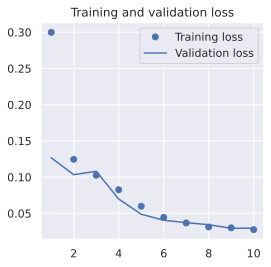

In [49]:
plt.figure(figsize = (4, 4))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# **Evaluating the model on test set**

## **Evaluation**

## **Convert the index to tag**

In [50]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_test_true = np.argmax(y_test, -1)

In [51]:
y_pred = [[idx2tag[i] for i in row] for row in y_pred]
y_test_true = [[idx2tag[i] for i in row] for row in y_test_true]

In [52]:
labels = list(df['Tag'].unique())
print(f"entities = {labels}")

entities = ['O', 'plant', 'disease']


In [53]:
print(y_test_true)

[['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'plant', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'disease', 'disease', 'disease', 'O', 'O', 'O', 'O', 'O', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD'], ['O', 'O', 'O', 'O'

In [54]:
print(y_pred)

[['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'plant', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'disease', 'disease', 'disease', 'O', 'O', 'O', 'O', 'O', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD'], ['O', 'O', 'O', 'O'

# **Precision, Recall, F-1 Scores**

In [55]:
# Precision
### Micro
micro_precision_PAD = flat_recall_score(y_test_true, y_pred, average = 'micro', labels=['PAD'])
micro_precision_o = flat_precision_score(y_test_true, y_pred, average = 'micro', labels=labels[0])
micro_precision_plant = flat_precision_score(y_test_true, y_pred, average = 'micro', labels=labels[1])
micro_precision_disease = flat_precision_score(y_test_true, y_pred, average = 'micro', labels=labels[2])
### Macro
macro_precision_PAD = flat_recall_score(y_test_true, y_pred, average = 'macro', labels=['PAD'])
macro_precision_o = flat_precision_score(y_test_true, y_pred, average = 'macro', labels=labels[0])
macro_precision_plant = flat_precision_score(y_test_true, y_pred, average = 'macro', labels=labels[1])
macro_precision_disease = flat_precision_score(y_test_true, y_pred, average = 'macro', labels=labels[2])
### weighted
weighted_precision_PAD = flat_recall_score(y_test_true, y_pred, average = 'weighted', labels=['PAD'])
weighted_precision_o = flat_precision_score(y_test_true, y_pred, average = 'weighted', labels=labels[0])
weighted_precision_plant = flat_precision_score(y_test_true, y_pred, average = 'weighted', labels=labels[1])
weighted_precision_disease = flat_precision_score(y_test_true, y_pred, average = 'weighted', labels=labels[2])

# Recall
### Micro
micro_recall_PAD = flat_recall_score(y_test_true, y_pred, average = 'micro', labels=['PAD'])
micro_recall_o = flat_recall_score(y_test_true, y_pred, average = 'micro', labels=labels[0])
micro_recall_plant = flat_recall_score(y_test_true, y_pred, average = 'micro', labels=labels[1])
micro_recall_disease = flat_recall_score(y_test_true, y_pred, average = 'micro', labels=labels[2])
### Macro
macro_recall_PAD = flat_recall_score(y_test_true, y_pred, average = 'macro', labels=['PAD'])
macro_recall_o = flat_recall_score(y_test_true, y_pred, average = 'macro', labels=labels[0])
macro_recall_plant = flat_recall_score(y_test_true, y_pred, average = 'macro', labels=labels[1])
macro_recall_disease = flat_recall_score(y_test_true, y_pred, average = 'macro', labels=labels[2])
### weighted
weighted_recall_PAD = flat_recall_score(y_test_true, y_pred, average = 'weighted', labels=['PAD'])
weighted_recall_o = flat_recall_score(y_test_true, y_pred, average = 'weighted', labels=labels[0])
weighted_recall_plant = flat_recall_score(y_test_true, y_pred, average = 'weighted', labels=labels[1])
weighted_recall_disease = flat_recall_score(y_test_true, y_pred, average = 'weighted', labels=labels[2])

# F-1
### Micro
micro_f1_score_PAD = flat_recall_score(y_test_true, y_pred, average = 'micro', labels=['PAD'])
micro_f1_score_o = flat_f1_score(y_test_true, y_pred, average = 'micro', labels=labels[0])
micro_f1_score_plant = flat_f1_score(y_test_true, y_pred, average = 'micro', labels=labels[1])
micro_f1_score_disease = flat_f1_score(y_test_true, y_pred, average = 'micro', labels=labels[2])
### Macro
macro_f1_score_PAD = flat_recall_score(y_test_true, y_pred, average = 'macro', labels=['PAD'])
macro_f1_score_o = flat_f1_score(y_test_true, y_pred, average = 'macro', labels=labels[0])
macro_f1_score_plant = flat_f1_score(y_test_true, y_pred, average = 'macro', labels=labels[1])
macro_f1_score_disease = flat_f1_score(y_test_true, y_pred, average = 'macro', labels=labels[2])
### weighted
weighted_f1_score_PAD = flat_recall_score(y_test_true, y_pred, average = 'weighted', labels=['PAD'])
weighted_f1_score_o = flat_f1_score(y_test_true, y_pred, average = 'weighted', labels=labels[0])
weighted_f1_score_plant = flat_f1_score(y_test_true, y_pred, average = 'weighted', labels=labels[1])
weighted_f1_score_disease = flat_f1_score(y_test_true, y_pred, average = 'weighted', labels=labels[2])


data_scores = {
    'Averages' : [
                  'Micro', 'Micro', 'Micro' ,'Micro', '', 
                  'Macro', 'Macro', 'Macro', 'Macro', '', 
                  'Weighted', 'Weighted', 'Weighted', 'Weighted'],
    'Entities' : [
                  'PAD', labels[0], labels[1], labels[2], '',  
                  'PAD', labels[0], labels[1], labels[2], '',  
                  'PAD', labels[0], labels[1], labels[2]],
    'Precision' : [
                   micro_precision_PAD, micro_precision_o, micro_precision_plant, micro_precision_disease, '', 
                   macro_precision_PAD, macro_precision_o, macro_precision_plant, macro_precision_disease, '', 
                   weighted_precision_PAD, weighted_precision_o, weighted_precision_plant, weighted_precision_disease],
    'Recall' : [
                micro_recall_PAD, micro_recall_o, micro_recall_plant, micro_recall_disease, '', 
                macro_recall_PAD, macro_recall_o, macro_recall_plant, macro_recall_disease, '', 
                weighted_recall_PAD, weighted_recall_o, weighted_recall_plant, weighted_recall_disease],
    'F-1 Scores' : [
                    micro_f1_score_PAD, micro_f1_score_o, micro_f1_score_plant, micro_f1_score_disease, '',
                    macro_f1_score_PAD, macro_f1_score_o, macro_f1_score_plant, macro_f1_score_disease, '',
                    weighted_f1_score_PAD, weighted_f1_score_o, weighted_f1_score_plant, weighted_f1_score_disease
                  ]
}

df_data_scores = pd.DataFrame(data_scores)
df_data_scores

,Averages,Entities,Precision,Recall,F-1 Scores
0,Micro,PAD,1.0,1.0,1.0
1,Micro,O,0.970007,0.956699,0.963307
2,Micro,plant,0.988494,0.988494,0.988494
3,Micro,disease,0.988494,0.988494,0.988494
4,,,,,
5,Macro,PAD,1.0,1.0,1.0
6,Macro,O,0.970007,0.956699,0.963307
7,Macro,plant,0.900164,0.91704,0.907448
8,Macro,disease,0.900164,0.91704,0.907448
9,,,,,


# **Save Report To Excel**

In [ ]:
! pip install xlsxwriter

import xlsxwriter

writer = pd.ExcelWriter('./drive/MyDrive/Colab Notebooks/bert_bilstm_crf_named_entity_recognition/BILSTM-CRF-NER/BiLSTM-CRF_Report.xlsx', engine='xlsxwriter')
df_data_scores.to_excel(writer, sheet_name='Uji1', index=False)
writer.save()

In [57]:
accuracy = flat_accuracy_score(y_test_true, y_pred)
print("Accuracy: {:.1%}".format(accuracy))

Accuracy: 98.8%


# **Every execution model picks some random test sample from test set**

In [58]:
i = np.random.randint(0,X_test.shape[0])
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
true = np.argmax(y_test[i], -1)

print("Sample number {} of {} (Test Set)".format(i, X_test.shape[0]))

print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_test[i], true, p[0]):
  if w != 0:
    print("{:15}: {:5} {}".format(words[w-2], idx2tag[t], idx2tag[pred]))

Sample number 128 of 197 (Test Set)
Word           ||True ||Pred
tobacco        : plant plant
related        : O     O
cancers        : disease disease
in             : O     O
madras         : O     O
india          : O     O


# **Save the result**

In [59]:
import pickle

In [60]:
with open('/content/drive/MyDrive/bert_bilstm_crf_named_entity_recognition/BILSTM-CRF-NER/output/word_to_index.pickle', 'wb') as f:
  pickle.dump(word_to_index, f)

with open('/content/drive/MyDrive/bert_bilstm_crf_named_entity_recognition/BILSTM-CRF-NER/output/tag_to_index.pickle', 'wb') as f:
  pickle.dump(tag_to_index, f)